# Linear Regression

##  原理

In [2]:
# y = wx + b

### 如何求解参数？

In [3]:
# 损失函数（目标函数）:Loss function

# 1.最小二乘法: Least square method
# 2.梯度下降: Gradient descent

## 梯度下降求解损失函数 

### 建模 - 方案（一）

cost: 	1.25e+02
w: 	20.7
b: 	4.09


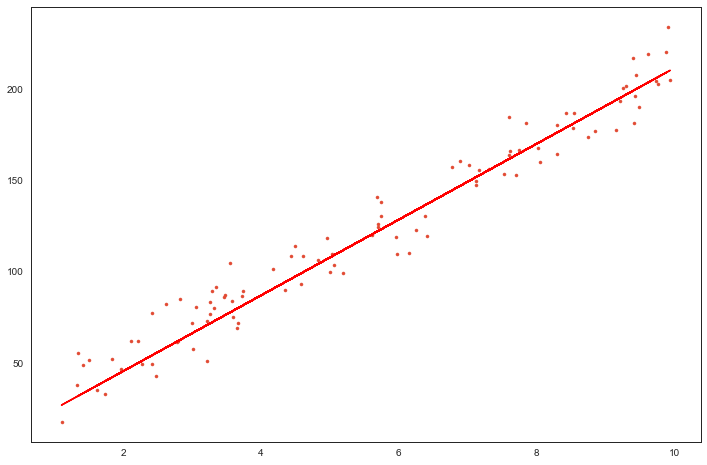

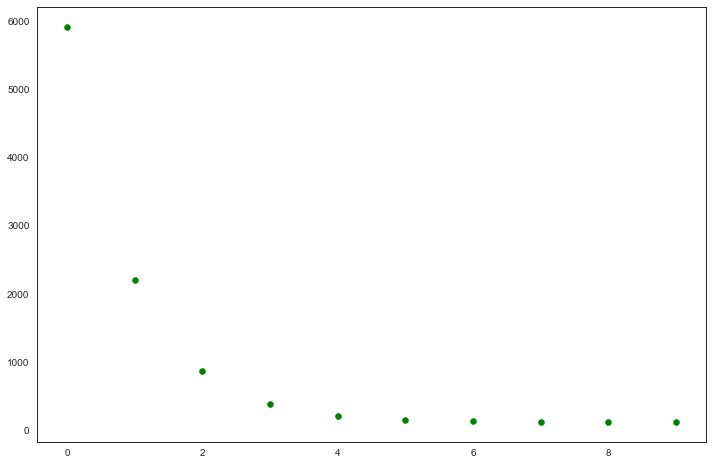

In [4]:
import numpy as np
np.set_printoptions(suppress=True)

class LinerRegression(object):

    def __init__(self, learning_rate=0.01, max_iter=100, seed=None):
        np.random.seed(seed)
        self.lr = learning_rate  # 设定学习率
        self.max_iter = max_iter # 
        self.w = np.random.normal(1, 0.1)  # 参数先随机假定
        self.b = np.random.normal(1, 0.1)  
        self.loss_arr = []

    def fit(self, x, y):
        self.x = x  # 传入数组，此处为1darray
        self.y = y  # 
        for i in range(self.max_iter):  # 
            self._train_step()
            self.loss_arr.append(self.loss())
#             print('loss: \t{:.3}'.format(self.loss()))
#             print('w: \t{:.3}'.format(self.w))
#             print('b: \t{:.3}'.format(self.b))

    def _f(self, x, w, b):
        return x * w + b

    def predict(self, x=None):
        if x is None:
            x = self.x
        y_pred = self._f(x, self.w, self.b)
        return y_pred

    def loss(self, y_true=None, y_pred=None):
        if y_true is None or y_pred is None:
            y_true = self.y
            y_pred = self.predict(self.x)
        return np.mean((y_true - y_pred)**2)

    def _calc_gradient(self):
        d_w = np.mean((self.x * self.w + self.b - self.y) * self.x)
        d_b = np.mean(self.x * self.w + self.b - self.y)
        return d_w, d_b

    def _train_step(self):
        d_w, d_b = self._calc_gradient()
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

import numpy as np
import matplotlib.pyplot as plt
# from liner_regression import *

def show_data(x, y, w=None, b=None):
    plt.scatter(x, y, marker='.')
    if w is not None and b is not None:
        plt.plot(x, w*x+b, c='red')
    plt.show()

    
# data generation
np.random.seed(222)
data_size = 100
x = np.random.uniform(low=1.0, high=10.0, size=data_size)
y = x * 20 + 10 + np.random.normal(loc=0.0, scale=10.0, size=data_size)
# plt.scatter(x, y, marker='.')
# plt.show()

# train / test split
shuffled_index = np.random.permutation(data_size)
x = x[shuffled_index]
y = y[shuffled_index]
split_index = int(data_size * 0.7)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# visualize data
# plt.scatter(x_train, y_train, marker='.')
# plt.show()
# plt.scatter(x_test, y_test, marker='.')
# plt.show()

# train the liner regression model
regr = LinerRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
print('cost: \t{:.3}'.format(regr.loss()))
print('w: \t{:.3}'.format(regr.w))
print('b: \t{:.3}'.format(regr.b))
show_data(x, y, regr.w, regr.b)

# plot the evolution of cost
plt.scatter(np.arange(len(regr.loss_arr)), regr.loss_arr, marker='o', c='green')
plt.show()

### 建模 - 方案（二）

In [14]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import IPython
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

#忽略警号
import warnings
warnings.filterwarnings("ignore")

import random
import time

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import xgboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

class LinearRegression(object):
    """simple linear regression & multivariate linear regression"""
    def __init__(self):
        self.w = 0                  #斜率
        self.b = 0                  #截距
        self.sqrLoss = 0            #最小均方误差
        self.trainSet = 0           #训练集特征
        self.label = 0              #训练集标签
        self.learning_rate = None   #学习率
        self.n_iters = None         #实际迭代次数
        self.lossList = []          #梯度下降每轮迭代的误差列表
    
    def train(self, X, y, method, learning_rate=0.1, n_iters=1000):
        if X.ndim < 2:
            raise ValueError("X must be 2D array-like!")
        self.trainSet = X
        self.label = y
        if method.lower() == "formula":
            self.__train_formula()
        elif method.lower() == "matrix":
            self.__train_matrix()
        elif method.lower() == "gradient":
            self.__train_gradient(learning_rate, n_iters)
        else:
            raise ValueError("method value not found!")
        return

    #公式求解法(仅适用于一元线性回归)
    def __train_formula(self):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet.flatten()
        y = self.label
        Xmean = np.mean(X)
        ymean = np.mean(y)
        #求w
        self.w = (np.dot(X, y) - n_samples*Xmean*ymean)/(np.power(X,2).sum() - n_samples*Xmean**2)
        #求b
        self.b = ymean - self.w*Xmean
        #求误差
        self.sqrLoss = np.power((y-np.dot(X,self.w) - self.b), 2).sum()
        return

    #矩阵求解法 - 其实还是公式求解法
    def __train_matrix(self):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #合并w和b，在X尾部添加一列全是1的特征
        X2 = np.hstack((X, np.ones((n_samples, 1))))
        #求w和b
        EX = np.linalg.inv(np.dot(X2.T,X2))
        what = np.dot(np.dot(EX,X2.T),y)  # theta
        self.w = what[:-1]
        self.b = what[-1]
        self.sqrLoss = np.power((y-np.dot(X2,what).flatten()), 2).sum()
        return

    #梯度下降法
    def __train_gradient(self, learning_rate, n_iters, minloss=1.0e-6):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #初始化迭代次数为0，初始化w0，b0为1，初始化误差平方和以及迭代误差之差
        n = 0
        w = np.ones(n_features)
        b = 1
        sqrLoss0 = np.power((y-np.dot(X,w).flatten()-b), 2).sum()
        self.lossList.append(sqrLoss0)
        deltaLoss = np.inf
        while (n<n_iters) and (sqrLoss0>minloss) and (abs(deltaLoss)>minloss):
            #求w和b的梯度
            ypredict = np.dot(X, w) + b
            gradient_w = -1.*np.dot((y - ypredict), X)/n_samples
            gradient_b = -1.*sum(y - ypredict)/n_samples
            #更新w和b
            w = w - learning_rate * gradient_w
            b = b - learning_rate * gradient_b
            #求更新后的误差和更新前后的误差之差
            sqrLoss1 = np.power((y-np.dot(X,w).flatten()-b), 2).sum()
            deltaLoss = sqrLoss0 - sqrLoss1
            sqrLoss0 = sqrLoss1
            self.lossList.append(sqrLoss0)
            n += 1
        print("第{}次迭代，损失平方和为{}，损失前后差为{}".format(n, sqrLoss0, deltaLoss))
        self.w = w
        self.b = b
        self.sqrLoss = sqrLoss0
        self.learning_rate = learning_rate
        self.n_iters = n+1
        return

def simpleLR(w, b, size=100):
    X = np.expand_dims(np.linspace(-10, 10, size), axis=1)
    y = X.flatten()*w + b + (np.random.random(size)-1)*3
    #公式法求解
    lr1 = LinearRegression()
    lr1.train(X, y, method='formula')
    print("【formula方法】\nw:{}, b:{}, square loss:{}".format(lr1.w, lr1.b, lr1.sqrLoss))
    #矩阵法求解
    lr2 = LinearRegression()
    lr2.train(X, y, method='Matrix')
    print("【matrix方法】\nw:{}, b:{}, square loss:{}".format(lr2.w, lr2.b, lr2.sqrLoss))
    #画图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X, y)
    ax.plot(X, X*lr2.w+lr2.b, color='r', linewidth=3)
    plt.show()
    return

def multivariateLR():
    from sklearn.datasets import load_boston
    X, y = load_boston(True)
    #将特征X标准化，方便收敛
    X = (X - X.mean(axis=0))/X.std(axis=0)
    #矩阵法求解
    lr1 = LinearRegression()
    lr1.train(X, y, method='Matrix')
    print("【formula方法】\nw:{}, b:{}, square loss:{}".format(lr1.w, lr1.b, lr1.sqrLoss))
    #梯度下降法求解
    lr2 = LinearRegression()
    lr2.train(X, y, method='Gradient', learning_rate=0.1, n_iters=5000)
    print("【matrix方法】\nw:{}, b:{}, square loss:{}".format(lr2.w, lr2.b, lr2.sqrLoss))
    #画梯度下降的误差下降图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(range(lr2.n_iters), lr2.lossList, linewidth=3)
    ax.set_title("Square Loss")
    plt.show()
    return

def sklearn_linear_model():
    from sklearn.datasets import load_boston
    x_array, y_array = load_boston(True)
    x = pd.DataFrame(x_array, columns=load_boston()['feature_names'])
    y = pd.DataFrame(y_array, columns=['Target'])
    xy = x.copy(deep=True)
    xy['Target'] = y
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(x_array)
    x_scaled = scaler.transform(x_array)
    x = pd.DataFrame(x_scaled, columns=load_boston()['feature_names'])
    
    xy.to_csv('housing.csv', sep = ',', encoding='UTF-8', index=0)
    
    
    x_train,x_test,y_train,y_test = model_selection.train_test_split(x, y)
    
    MLA = [
        ensemble.AdaBoostRegressor(),
        ensemble.BaggingRegressor(),
        ensemble.RandomForestRegressor(),
        gaussian_process.GaussianProcessRegressor(),
#         linear_model.LogisticRegressionCV(),  # 要求输出离散结果
        linear_model.ElasticNet(),
        linear_model.RidgeCV(),
        svm.SVR(),
        tree.DecisionTreeRegressor(),
        xgboost.XGBRegressor()
    ]
    
    cv_split = model_selection.ShuffleSplit(n_splits=10,test_size=.3,train_size=.6,)
    MLA_compare = pd.DataFrame()
    
    
    MLA_pred = pd.DataFrame(y_test)
    
    for i, alg in enumerate(MLA):
        
#         print(alg.__class__.__name__)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[i, 'MLA Name'] = MLA_name
        
        cv_results = model_selection.cross_validate(alg, x_train, y_train, cv=cv_split)
        
        MLA_compare.loc[i, 'MLA Score'] = cv_results['test_score'].mean()
        
        alg.fit(x_train, y_train)
        MLA_pred[MLA_name] = alg.predict(x_test)
        MLA_compare.loc[i, 'R2 Score'] = metrics.r2_score(MLA_pred['Target'], MLA_pred[MLA_name])
        MLA_compare.loc[i, 'MSE'] = metrics.mean_squared_error(MLA_pred['Target'], MLA_pred[MLA_name])
        MLA_compare.loc[i, 'MAE'] = metrics.mean_absolute_error(MLA_pred['Target'], MLA_pred[MLA_name])
        
    MLA_compare.sort_values(by = ['R2 Score'], ascending = False, inplace = True)
    print(MLA_compare)  

    return



if __name__ == "__main__":
    #1、先用公式法和矩阵法测试下一元线性回归
#     simpleLR(1.34, 2.08)
    #2、再用矩阵法和梯度下降法测试下多元线性回归
#     multivariateLR()
    
    # 下面调用sklearn的库，以波士顿房价为例
    # 比较后认为具有竞争力的模型有随机森林和XGB两种回归模型，将新建文件深入研究
    sklearn_linear_model()

